# Comparison values. Поиск одинаковых товаров на маркет плейсе

In [1]:
import pandas as pd
df = pd.read_json('2108.json')
display(df.head(2))
df.shape


,_id,name_store,main_category_name,main_category_img_url,category_name,category_img_url,category_permalink,product_name,product_img_link,product_instamart_price,...,product_price_type,product_stock,product_stock_rate,product_max_stock_rate,product_discounted,product_discount,product_unit_price,product_description,product_description_original,product_properties
0,{'$oid': '630212d23cf774ebcd698d11'},5ka,"Канцелярия, творчество, журналы",{'url': 'https://sbermarket.ru/statics/spree/t...,"Бумага, бумажные изделия",{'url': 'https://sbermarket.ru/statics/spree/t...,kantselyariya-tvorchestvo-zhurnali/bumaga-buma...,Альбом для рисования ArtSpace Увлечения. My ho...,"{'preview': [], 'small': []}",149.99,...,per_item,5,0,0,False,0.0,149.99,Товар представлен в ассортименте: два варианта...,Товар представлен в ассортименте: два варианта...,"{'product_ingredients': {}, 'product_nutrition..."
1,{'$oid': '630212d23cf774ebcd698d12'},5ka,"Канцелярия, творчество, журналы",{'url': 'https://sbermarket.ru/statics/spree/t...,"Бумага, бумажные изделия",{'url': 'https://sbermarket.ru/statics/spree/t...,kantselyariya-tvorchestvo-zhurnali/bumaga-buma...,Тетрадь общая ArtSpace Моноколор Blue&Green 48...,{'preview': [{'url': 'https://sbermarket.ru/sp...,49.99,...,per_item,10,0,0,False,0.0,49.99,Тетрадь общая ArtSpace Моноколор. Blue&Green; ...,Тетрадь общая ArtSpace Моноколор. Blue&Green; ...,"{'product_ingredients': {}, 'product_nutrition..."


(115555, 24)

# Модель

In [2]:
from PIL import Image   
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np

#main_category_img_url
#category_img_url
#product_img_link

# возвращает изображение по индексу товара. указывается индекс товара
def img(i=0):
    col = 'main_category_img_url'
    r = np.random.randint(2, df.shape[0])
    pic = df[col][i]['url']
    return Image.open(urlopen(pic))

# выводит результат исследования. схождения двух товаров. указываются индексы товаров для сравнения
def comparison(i1=0,i2=1):
    n1, a = df['product_name'][i1], df['product_properties'][i1]['product_information']
    n2, b = 'Результат:'+df['product_name'][i2], df['product_properties'][i2]['product_information']
    d = pd.concat([pd.Series(a, name=n1),pd.Series(b, name=n2)], axis=1)
    d['Cхождениe'] = d[n1] == d[n2]
    true = str(round((len(d.query('Cхождениe == True'))/len(d)*100),2))

    try:
        fig, axes = plt.subplots(1, 2)
        axes[0].imshow(img(i1))
        axes[0].set_title(n1)
        axes[1].imshow(img(i2))
        axes[1].set_title(n2)
        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])
        fig.set_figwidth(15)
        fig.set_figheight(3)
        plt.show()
        print('\nCхождений: '+true+' %')
        display(d)
        display(df.loc[[i1, i2]])
    except:
        print('\nCхождений: '+true+' %')
        display(d)
        display(df.loc[[i1, i2]])

# возращает таблицу. добавляет признак 'comparison' - процент схождения искомого товара ко всем в таблице
def model(i1=0):
    true_list = []
    data = df.copy()
    for i2 in range(df.shape[0]):
        n1, a = data['product_name'][i1], data['product_properties'][i1]['product_information']
        n2, b = 'Результат:'+data['product_name'][i2], data['product_properties'][i2]['product_information']
        d = pd.concat([pd.Series(a, name=n1),pd.Series(b, name=n2)], axis=1)
        d['Cхождениe'] = d[n1] == d[n2]
        true = round((len(d.query('Cхождениe == True'))/len(d)*100),2)
        true_list.append(true)
    data['comparison'] = true_list
    return data
    

# Итог. Выводим наиболее подоходящую пару к искомому товару

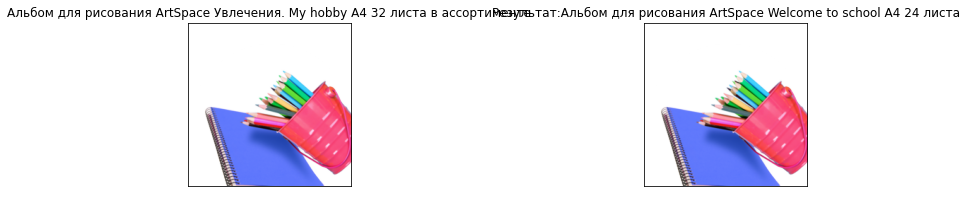


Cхождений: 72.22 %


,Альбом для рисования ArtSpace Увлечения. My hobby А4 32 листа в ассортименте,Результат:Альбом для рисования ArtSpace Welcome to school А4 24 листа,Cхождениe
brand,ArtSpace,ArtSpace,True
manufacturer,Рельеф-Центр ООО,Маяк Канц ООО,False
manufacturing_country,Россия,Россия,True
Тип изделия,Альбомы для рисования,Альбомы для рисования,True
Формат,А4,А4,True
Количество листов,32 листа,24 листа,False
Внутренний блок,Офсетная бумага,Офсетная бумага,True
Размер внутреннего блока,203 х 290 мм,203 х 290 мм,True
Тип скрепления,Скрепка,Скрепка,True
Плотность бумаги,100 г/м²,100 г/м²,True


,_id,name_store,main_category_name,main_category_img_url,category_name,category_img_url,category_permalink,product_name,product_img_link,product_instamart_price,...,product_price_type,product_stock,product_stock_rate,product_max_stock_rate,product_discounted,product_discount,product_unit_price,product_description,product_description_original,product_properties
0,{'$oid': '630212d23cf774ebcd698d11'},5ka,"Канцелярия, творчество, журналы",{'url': 'https://sbermarket.ru/statics/spree/t...,"Бумага, бумажные изделия",{'url': 'https://sbermarket.ru/statics/spree/t...,kantselyariya-tvorchestvo-zhurnali/bumaga-buma...,Альбом для рисования ArtSpace Увлечения. My ho...,"{'preview': [], 'small': []}",149.99,...,per_item,5,0,0,False,0.0,149.99,Товар представлен в ассортименте: два варианта...,Товар представлен в ассортименте: два варианта...,"{'product_ingredients': {}, 'product_nutrition..."
51131,{'$oid': '630219203cf774ebcd6a54cc'},globus,"Канцтовары, книги, творчество",{'url': 'https://sbermarket.ru/statics/spree/t...,Товары для рисования,{'url': 'https://sbermarket.ru/statics/spree/t...,katalog-globus/kantstovari-knigi-tvorchestvo/t...,Альбом для рисования ArtSpace Welcome to schoo...,{'preview': [{'url': 'https://sbermarket.ru/sp...,99.99,...,per_item,57,0,0,True,20.0,79.99,Альбом для рисования ArtSpace Школьный. Welcom...,Альбом для рисования ArtSpace Школьный. Welcom...,"{'product_ingredients': {}, 'product_nutrition..."


Wall time: 3min 57s


In [3]:
%%time
i1 = 0 # Индекс первого товара. Относительно этого товара идет поиск по всей таблице.
data = model(i1)
comparison(i1,i2=data.sort_values('comparison', ascending=False).reset_index()['index'][1])


# Наиболее схожие товары в таблице к искомому товару

In [16]:
display(data.sort_values('comparison', ascending=False)
            .reset_index(drop=True)
            .loc[1:5, ['name_store', 'product_name', 
                       'main_category_name', 'category_name', 
                       'product_description_original', 'comparison']])


,name_store,product_name,main_category_name,category_name,product_description_original,comparison
1,globus,Альбом для рисования ArtSpace Welcome to schoo...,"Канцтовары, книги, творчество",Товары для рисования,Альбом для рисования ArtSpace Школьный. Welcom...,72.22
2,globus,Альбом для рисования ArtSpace А4 32 листа,"Канцтовары, книги, творчество",Товары для рисования,,64.71
3,globus,Альбом Hatber для рисования Животные на скобе ...,"Канцтовары, книги, творчество",Товары для рисования,,61.11
4,okey,Альбом для рисования Проф-Пресс Супертиранноза...,Детские товары,Рисование,Наши альбомы для рисования вдохновят юных худо...,58.82
5,okey,Альбом для рисования ArtSpace Рисунки Avocat А...,Детские товары,"Тетради, блокноты, дневники",,58.82
